# Sample processing 
This script shows how you can process a json file produced by submitting to Aquila 
(or the bloqade backends).

* Note that we are NOT importing bloqade here but it could be useful in some circumstances. 
* Note that there is no API for directly pulling from the dashboard used by QuEra so you have to download the json results file somewhere before processing it.
* Note that Aquila qubits are initialized in the $\ket{1}$ state, **not** $\ket{0}$

In [1]:
# import the json library to read file 
import json
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
# load the data
results_path="#############"

# as an example you can use the sample output provided in the repo
results_path="examples/results/5003-2617153582.json"

# this example is a simple two-qubit system and evoling this under a +pi rotation

with open(results_path, 'r') as json_file:
    results = json.load(json_file)

In [4]:
# the json will have the task status, shot_outputs and for each shot the initial and final states
print(results)

{'task_status': 'Completed', 'shot_outputs': [{'shot_status': 'Completed', 'pre_sequence': [1, 1], 'post_sequence': [0, 0]}, {'shot_status': 'Completed', 'pre_sequence': [1, 1], 'post_sequence': [0, 0]}, {'shot_status': 'Completed', 'pre_sequence': [1, 1], 'post_sequence': [0, 0]}, {'shot_status': 'Completed', 'pre_sequence': [1, 1], 'post_sequence': [0, 1]}, {'shot_status': 'Completed', 'pre_sequence': [1, 1], 'post_sequence': [0, 1]}, {'shot_status': 'Completed', 'pre_sequence': [1, 1], 'post_sequence': [0, 0]}, {'shot_status': 'Completed', 'pre_sequence': [1, 1], 'post_sequence': [0, 0]}, {'shot_status': 'Completed', 'pre_sequence': [1, 1], 'post_sequence': [0, 1]}, {'shot_status': 'Completed', 'pre_sequence': [1, 1], 'post_sequence': [1, 0]}, {'shot_status': 'Completed', 'pre_sequence': [1, 1], 'post_sequence': [0, 0]}]}


## Filtering results 
It can be very desirable to filter results based on the pre_sequence and the shot status.

In [5]:
# Filter 'post_sequence' based on 'pre_sequence' and 'shot_status'
def FilterPostSequence(results : dict, desired_pre_sequence : list):
    '''Filter the results dictionary so that it only contains the output of shots that were successfully completed
    and had the desired initial state
    '''
    post_selected_results = list()
    if results['task_status'] != 'Completed': 
        return post_selected_results
    
    post_selected_results = [
        shot['post_sequence'] 
        for shot in results['shot_outputs'] 
        if shot['pre_sequence'] == desired_pre_sequence and shot['shot_status'] == 'Completed'
    ]
    return post_selected_results

## Examining Results
Let's look at the post-processed results. 

In [7]:
# now lets try storing the post selection
post_selected_results = FilterPostSequence(results, [1,1])
print(f'{len(post_selected_results)} of {len(results["shot_outputs"])} shots post-selected.')
# note that this example is a simple 

10 of 10 shots post-selected.


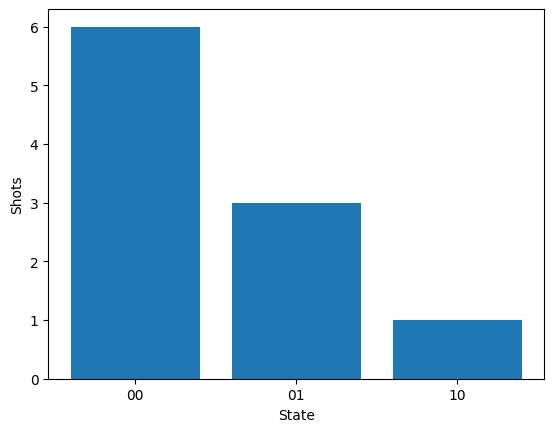

In [10]:
# lets plot the results 
post_sequence_tally = Counter(tuple(seq) for seq in post_selected_results)

labels, counts = zip(*post_sequence_tally.items())
labels = [''.join(map(str, label)) for label in labels]

plt.bar(labels, counts)
plt.xlabel('State')
plt.ylabel('Shots')
plt.show()

## Interpreting results 
The results file does NOT contain any information about the circuit (that is stored in the job submission json file). In this case, the evolution of the two qubits is such that we are effectively doing a $\ket{11}\rightarrow\ket{00}$ transition. You can see that the above graph does have the desired output being the dominate state but there are other states that are populated. This is because the initial spacing between the qubits was not exactly as desired to produce the NOT gate on both qubits. 

### Questions: 

* why is it not perfect for the simple evolution? (consider the Hamiltonian)
* is it actually asymmetric in the $\ket{01}$ $\ket{10}$ states? If so why?

